# ¿Cómo determinar la calidad del aire a partir de datos de variebles fisicoquimicas obtenidas mediante sensores?

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Caracteristicas
td = np.float16

dtype = {
    "DATE": np.datetime64,
    "TIME": "str",
    "CO_GT": td,
    "PT08_S1_CO": td,
    "NMHC_GT": td,
    "C6H6_GT": td,
    "PT08_S2_NMHC": td,
    "NOX_GT": td,
    "PT08_S3_NOX": td,
    "NO2_GT": td,
    "PT08_S4_NO2": td,
    "PT08_S5_O3": td,
    "T": td,
    "RH": td,
    "AH": td,
}

col = dtype.keys()
# pd.options.display.float_format='{:,.4f}'.format

In [3]:
# read the data from excel
datos = pd.read_excel("AirQualityUCI.xlsx", names=col, dtype=dtype)

In [4]:
datos.shape

(9357, 15)

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          9357 non-null   datetime64[ns]
 1   TIME          9357 non-null   object        
 2   CO_GT         9357 non-null   float16       
 3   PT08_S1_CO    9357 non-null   float16       
 4   NMHC_GT       9357 non-null   float16       
 5   C6H6_GT       9357 non-null   float16       
 6   PT08_S2_NMHC  9357 non-null   float16       
 7   NOX_GT        9357 non-null   float16       
 8   PT08_S3_NOX   9357 non-null   float16       
 9   NO2_GT        9357 non-null   float16       
 10  PT08_S4_NO2   9357 non-null   float16       
 11  PT08_S5_O3    9357 non-null   float16       
 12  T             9357 non-null   float16       
 13  RH            9357 non-null   float16       
 14  AH            9357 non-null   float16       
dtypes: datetime64[ns](1), float16(13), obj

In [6]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
CO_GT,9357.0,-inf,77.62500,-200.0,0.600098,1.500000,2.599609,11.898438
PT08_S1_CO,9357.0,inf,inf,-200.0,921.000000,1052.000000,1221.000000,2040.000000
NMHC_GT,9357.0,-inf,inf,-200.0,-200.000000,-200.000000,-200.000000,1189.000000
C6H6_GT,9357.0,1.865234,41.37500,-200.0,4.003906,7.886719,13.632812,63.750000
PT08_S2_NMHC,9357.0,inf,inf,-200.0,711.000000,894.500000,1105.000000,2214.000000
NOX_GT,9357.0,inf,inf,-200.0,50.000000,141.000000,284.250000,1479.000000
PT08_S3_NOX,9357.0,inf,inf,-200.0,637.000000,794.000000,960.000000,2682.000000
NO2_GT,9357.0,inf,inf,-200.0,53.000000,96.000000,133.000000,339.750000
PT08_S4_NO2,9357.0,inf,inf,-200.0,1185.000000,1446.000000,1662.000000,2776.000000
PT08_S5_O3,9357.0,inf,inf,-200.0,700.000000,942.000000,1255.000000,2522.000000


In [7]:
datos.memory_usage()

Index             128
DATE            74856
TIME            74856
CO_GT           18714
PT08_S1_CO      18714
NMHC_GT         18714
C6H6_GT         18714
PT08_S2_NMHC    18714
NOX_GT          18714
PT08_S3_NOX     18714
NO2_GT          18714
PT08_S4_NO2     18714
PT08_S5_O3      18714
T               18714
RH              18714
AH              18714
dtype: int64

In [8]:
datos.columns

Index(['DATE', 'TIME', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'T', 'RH', 'AH'],
      dtype='object')

In [9]:
datos.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-03-10,18:00:00,2.599609,1360.0,150.0,11.882812,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.601562,48.87500,0.757812
1,2004-03-10,19:00:00,2.000000,1292.0,112.0,9.398438,955.0,103.0,1174.0,92.0,1559.0,972.0,13.296875,47.68750,0.725586
2,2004-03-10,20:00:00,2.199219,1402.0,88.0,9.000000,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.898438,53.96875,0.750000
3,2004-03-10,21:00:00,2.199219,1376.0,80.0,9.226562,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.000000,60.00000,0.786621
4,2004-03-10,22:00:00,1.599609,1272.0,51.0,6.519531,835.5,131.0,1205.0,116.0,1490.0,1110.0,11.148438,59.56250,0.788574


In [10]:
datos.tail()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9352,2005-04-04,10:00:00,3.099609,1314.0,-200.0,13.531250,1101.0,471.75,538.5,189.75,1374.0,1728.0,21.843750,29.250000,0.756836
9353,2005-04-04,11:00:00,2.400391,1162.0,-200.0,11.351562,1027.0,353.25,604.0,179.25,1264.0,1269.0,24.328125,23.718750,0.711914
9354,2005-04-04,12:00:00,2.400391,1142.0,-200.0,12.375000,1062.0,293.00,603.0,174.75,1241.0,1092.0,26.906250,18.343750,0.640625
9355,2005-04-04,13:00:00,2.099609,1002.5,-200.0,9.546875,960.5,234.50,701.5,155.75,1041.0,770.0,28.328125,13.546875,0.513672
9356,2005-04-04,14:00:00,2.199219,1071.0,-200.0,11.929688,1047.0,265.25,654.0,167.75,1128.0,816.0,28.500000,13.125000,0.502930


In [11]:
# cuantos valores nulos tiene cada columna
for col in datos.columns:
    print(f"{col}: {datos[col].isna().sum()}")

DATE: 0
TIME: 0
CO_GT: 0
PT08_S1_CO: 0
NMHC_GT: 0
C6H6_GT: 0
PT08_S2_NMHC: 0
NOX_GT: 0
PT08_S3_NOX: 0
NO2_GT: 0
PT08_S4_NO2: 0
PT08_S5_O3: 0
T: 0
RH: 0
AH: 0


In [12]:
# cuantos valores -200=NaN hay por cada columna
for col in datos.columns:
    print(f"{col}: {sum(datos[col]==-200)}")

DATE: 0
TIME: 0
CO_GT: 1683
PT08_S1_CO: 366
NMHC_GT: 8443
C6H6_GT: 366
PT08_S2_NMHC: 366
NOX_GT: 1639
PT08_S3_NOX: 366
NO2_GT: 1642
PT08_S4_NO2: 366
PT08_S5_O3: 366
T: 366
RH: 366
AH: 366


# Limpieza de Datos

In [13]:
# Eliminar columna NMHC_GT con 8443 valores nulos
datos.drop(columns=["NMHC_GT"], inplace=True)

In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          9357 non-null   datetime64[ns]
 1   TIME          9357 non-null   object        
 2   CO_GT         9357 non-null   float16       
 3   PT08_S1_CO    9357 non-null   float16       
 4   C6H6_GT       9357 non-null   float16       
 5   PT08_S2_NMHC  9357 non-null   float16       
 6   NOX_GT        9357 non-null   float16       
 7   PT08_S3_NOX   9357 non-null   float16       
 8   NO2_GT        9357 non-null   float16       
 9   PT08_S4_NO2   9357 non-null   float16       
 10  PT08_S5_O3    9357 non-null   float16       
 11  T             9357 non-null   float16       
 12  RH            9357 non-null   float16       
 13  AH            9357 non-null   float16       
dtypes: datetime64[ns](1), float16(12), object(1)
memory usage: 365.6+ KB


In [15]:
# cuantos valores -200=NaN hay por cada columna
print("cuantos valores -200=NaN hay por cada columna")
for col in datos.columns:
    print(f"{col}: {sum(datos[col]==-200)}")

cuantos valores -200=NaN hay por cada columna
DATE: 0
TIME: 0
CO_GT: 1683
PT08_S1_CO: 366
C6H6_GT: 366
PT08_S2_NMHC: 366
NOX_GT: 1639
PT08_S3_NOX: 366
NO2_GT: 1642
PT08_S4_NO2: 366
PT08_S5_O3: 366
T: 366
RH: 366
AH: 366


In [16]:
print("Cantidad de valores validos:\n", datos.shape[0] - datos[datos == -200].count())

Cantidad de valores validos:
 DATE            9357
TIME            9357
CO_GT           7674
PT08_S1_CO      8991
C6H6_GT         8991
PT08_S2_NMHC    8991
NOX_GT          7718
PT08_S3_NOX     8991
NO2_GT          7715
PT08_S4_NO2     8991
PT08_S5_O3      8991
T               8991
RH              8991
AH              8991
dtype: int64


# Modificar las variables DATE y TIME
1) Se va convertir la fecha dejando solamente el mes.
    Se asume que no hay variaciones entre el mismo mes en diferentes años
2) La TIME se convierte a numerico, tomando sola la parte de la hora

In [17]:
datos.head()

,DATE,TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-03-10,18:00:00,2.599609,1360.0,11.882812,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.601562,48.87500,0.757812
1,2004-03-10,19:00:00,2.000000,1292.0,9.398438,955.0,103.0,1174.0,92.0,1559.0,972.0,13.296875,47.68750,0.725586
2,2004-03-10,20:00:00,2.199219,1402.0,9.000000,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.898438,53.96875,0.750000
3,2004-03-10,21:00:00,2.199219,1376.0,9.226562,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.000000,60.00000,0.786621
4,2004-03-10,22:00:00,1.599609,1272.0,6.519531,835.5,131.0,1205.0,116.0,1490.0,1110.0,11.148438,59.56250,0.788574


In [18]:
# Dividir columna de tiempo en nueva columna -> HOUR
datos["HOUR"] = (datos["TIME"].apply(lambda x: int(str(x).split(":")[0]))).astype(
    np.int8
)
datos.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int8

In [19]:
# Eliminar columna TIME
datos.drop("TIME", axis=1, inplace=True)

In [20]:
datos.head()

,DATE,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR
0,2004-03-10,2.599609,1360.0,11.882812,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.601562,48.87500,0.757812,18
1,2004-03-10,2.000000,1292.0,9.398438,955.0,103.0,1174.0,92.0,1559.0,972.0,13.296875,47.68750,0.725586,19
2,2004-03-10,2.199219,1402.0,9.000000,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.898438,53.96875,0.750000,20
3,2004-03-10,2.199219,1376.0,9.226562,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.000000,60.00000,0.786621,21
4,2004-03-10,1.599609,1272.0,6.519531,835.5,131.0,1205.0,116.0,1490.0,1110.0,11.148438,59.56250,0.788574,22


In [21]:
# Cambiar el formato de la columna date
datos["DATE"].info()
datos["DATE"] = pd.to_datetime(datos["DATE"], format="%m/%d/%Y")
datos["DATE"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9357 entries, 0 to 9356
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 73.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 9357 entries, 0 to 9356
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 73.2 KB


In [22]:
datos.DATE.describe()

/tmp/ipykernel_25875/2416154812.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  datos.DATE.describe()


count                    9357
unique                    391
top       2004-09-21 00:00:00
freq                       24
first     2004-03-10 00:00:00
last      2005-04-04 00:00:00
Name: DATE, dtype: object

In [23]:
datos.DATE.value_counts()

2004-09-21    24
2004-11-09    24
2004-12-01    24
2004-11-30    24
2004-11-29    24
              ..
2004-07-13    24
2004-07-12    24
2005-04-02    24
2005-04-04    15
2004-03-10     6
Name: DATE, Length: 391, dtype: int64

In [24]:
datos.head()

,DATE,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR
0,2004-03-10,2.599609,1360.0,11.882812,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.601562,48.87500,0.757812,18
1,2004-03-10,2.000000,1292.0,9.398438,955.0,103.0,1174.0,92.0,1559.0,972.0,13.296875,47.68750,0.725586,19
2,2004-03-10,2.199219,1402.0,9.000000,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.898438,53.96875,0.750000,20
3,2004-03-10,2.199219,1376.0,9.226562,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.000000,60.00000,0.786621,21
4,2004-03-10,1.599609,1272.0,6.519531,835.5,131.0,1205.0,116.0,1490.0,1110.0,11.148438,59.56250,0.788574,22


In [25]:
# ajustar el index como columna DATE
datos.set_index("DATE", inplace=True)

In [26]:
# Crear columna mes (ejecutar una vez)
datos["MONTH"] = datos.index.month
datos["MONTH"] = datos["MONTH"].astype(np.int8)

In [27]:
datos.head()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
DATE,,,,,,,,,,,,,,
2004-03-10,2.599609,1360.0,11.882812,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.601562,48.87500,0.757812,18,3
2004-03-10,2.000000,1292.0,9.398438,955.0,103.0,1174.0,92.0,1559.0,972.0,13.296875,47.68750,0.725586,19,3
2004-03-10,2.199219,1402.0,9.000000,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.898438,53.96875,0.750000,20,3
2004-03-10,2.199219,1376.0,9.226562,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.000000,60.00000,0.786621,21,3
2004-03-10,1.599609,1272.0,6.519531,835.5,131.0,1205.0,116.0,1490.0,1110.0,11.148438,59.56250,0.788574,22,3


In [28]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 to 2005-04-04
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO_GT         9357 non-null   float16
 1   PT08_S1_CO    9357 non-null   float16
 2   C6H6_GT       9357 non-null   float16
 3   PT08_S2_NMHC  9357 non-null   float16
 4   NOX_GT        9357 non-null   float16
 5   PT08_S3_NOX   9357 non-null   float16
 6   NO2_GT        9357 non-null   float16
 7   PT08_S4_NO2   9357 non-null   float16
 8   PT08_S5_O3    9357 non-null   float16
 9   T             9357 non-null   float16
 10  RH            9357 non-null   float16
 11  AH            9357 non-null   float16
 12  HOUR          9357 non-null   int8   
 13  MONTH         9357 non-null   int8   
dtypes: float16(12), int8(2)
memory usage: 310.7 KB


In [29]:
# cuantos valores -200=NaN hay por cada columna
datos[datos == -200].count()

CO_GT           1683
PT08_S1_CO       366
C6H6_GT          366
PT08_S2_NMHC     366
NOX_GT          1639
PT08_S3_NOX      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
HOUR               0
MONTH              0
dtype: int64

In [30]:
# Valores nulos como NaN = -200
print("Cantidad de valores nulos como NaN = -200")
print("CO_GT: ", (datos["CO_GT"] == -200).sum())
print("NOX_GT: ", (datos["NOX_GT"] == -200).sum())
print("NO2_GT: ", (datos["NO2_GT"] == -200).sum())

Cantidad de valores nulos como NaN = -200
CO_GT:  1683
NOX_GT:  1639
NO2_GT:  1642


In [31]:
# Reemplazar los valores nulos -200 por np.NAN
datos[datos == -200] = np.NAN

In [32]:
# Valores nulos como NaN = -200
print("Cantidad de valores nulos como NaN = -200")
print("CO_GT: ", (datos["CO_GT"] == -200).sum())
print("NOX_GT: ", (datos["NOX_GT"] == -200).sum())
print("NO2_GT: ", (datos["NO2_GT"] == -200).sum())

Cantidad de valores nulos como NaN = -200
CO_GT:  0
NOX_GT:  0
NO2_GT:  0


In [33]:
# cantidad de valores nulos por cada caracteristica
datos.isna().sum()

CO_GT           1683
PT08_S1_CO       366
C6H6_GT          366
PT08_S2_NMHC     366
NOX_GT          1639
PT08_S3_NOX      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
HOUR               0
MONTH              0
dtype: int64

In [34]:
# Cantidad de valores nulos NaN en todo el dataset
print(datos.isna().sum().sum())

8258


In [35]:
# eliminar valores NaN para todo el dataset según los valores nulos de la columna AH
datos.dropna(subset=["AH"], inplace=True)

In [36]:
# Valores nulos en la columna AH
datos["AH"].isna().sum()

0

In [37]:
# cantidad de valores nulos
datos.isna().sum()

CO_GT           1647
PT08_S1_CO         0
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
MONTH              0
dtype: int64

In [38]:
datos.tail()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
DATE,,,,,,,,,,,,,,
2005-04-04,3.099609,1314.0,13.531250,1101.0,471.75,538.5,189.75,1374.0,1728.0,21.843750,29.250000,0.756836,10,4
2005-04-04,2.400391,1162.0,11.351562,1027.0,353.25,604.0,179.25,1264.0,1269.0,24.328125,23.718750,0.711914,11,4
2005-04-04,2.400391,1142.0,12.375000,1062.0,293.00,603.0,174.75,1241.0,1092.0,26.906250,18.343750,0.640625,12,4
2005-04-04,2.099609,1002.5,9.546875,960.5,234.50,701.5,155.75,1041.0,770.0,28.328125,13.546875,0.513672,13,4
2005-04-04,2.199219,1071.0,11.929688,1047.0,265.25,654.0,167.75,1128.0,816.0,28.500000,13.125000,0.502930,14,4


In [39]:
# agrupar datos
datos["CO_GT"].resample("D").mean()

DATE
2004-03-10    1.966309
2004-03-11    2.239130
2004-03-12    2.804399
2004-03-13    2.695482
2004-03-14    2.469663
                ...   
2005-03-31    1.387533
2005-04-01    1.108632
2005-04-02    0.854065
2005-04-03    1.141652
2005-04-04    2.078509
Freq: D, Name: CO_GT, Length: 391, dtype: float32

In [40]:
# Llenar los valores de NaN con el promedio mensual de una hora en particular
# agrupo los datos por mes y en cada hora
# suponiendo que la calidad del aire no varia entre los dias del mismo mes

datos["CO_GT"] = (
    datos["CO_GT"].fillna(datos["CO_GT"].resample("D").mean()).astype(np.float16)
)
datos["NOX_GT"] = (
    datos["NOX_GT"].fillna(datos["NOX_GT"].resample("D").mean()).astype(np.float16)
)
datos["NO2_GT"] = (
    datos["NO2_GT"].fillna(datos["NO2_GT"].resample("D").mean()).astype(np.float16)
)

In [41]:
# cantidad de valores nulos
datos.isna().sum()

CO_GT           864
PT08_S1_CO        0
C6H6_GT           0
PT08_S2_NMHC      0
NOX_GT          816
PT08_S3_NOX       0
NO2_GT          816
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                0
HOUR              0
MONTH             0
dtype: int64

In [42]:
# Llenar los valores de NaN con el promedio mensual de una hora en particular
# agrupo los datos por mes y en cada hora
# suponiendo que la calidad del aire no varia entre los dias del mismo mes

datos["CO_GT"] = (
    datos["CO_GT"]
    .fillna(datos.groupby(["MONTH", "HOUR"])["CO_GT"].transform("mean"))
    .astype(np.float16)
)
datos["NOX_GT"] = (
    datos["NOX_GT"]
    .fillna(datos.groupby(["MONTH", "HOUR"])["NOX_GT"].transform("mean"))
    .astype(np.float16)
)
datos["NO2_GT"] = (
    datos["NO2_GT"]
    .fillna(datos.groupby(["MONTH", "HOUR"])["NO2_GT"].transform("mean"))
    .astype(np.float16)
)

In [43]:
# cantidad de valores nulos
datos.isna().sum()

CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
HOUR            0
MONTH           0
dtype: int64

In [44]:
# eliminar valores NaN para todo el dataset
datos.dropna(inplace=True)

In [45]:
# cantidad de valores nulos
datos.isna().sum()

CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
HOUR            0
MONTH           0
dtype: int64

In [46]:
# Eliminar valores duplicados
datos.drop_duplicates(inplace=True)

In [47]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8991 entries, 2004-03-10 to 2005-04-04
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO_GT         8991 non-null   float16
 1   PT08_S1_CO    8991 non-null   float16
 2   C6H6_GT       8991 non-null   float16
 3   PT08_S2_NMHC  8991 non-null   float16
 4   NOX_GT        8991 non-null   float16
 5   PT08_S3_NOX   8991 non-null   float16
 6   NO2_GT        8991 non-null   float16
 7   PT08_S4_NO2   8991 non-null   float16
 8   PT08_S5_O3    8991 non-null   float16
 9   T             8991 non-null   float16
 10  RH            8991 non-null   float16
 11  AH            8991 non-null   float16
 12  HOUR          8991 non-null   int8   
 13  MONTH         8991 non-null   int8   
dtypes: float16(12), int8(2)
memory usage: 298.5 KB


In [48]:
datos[
    [
        "CO_GT",
        "PT08_S1_CO",
        "C6H6_GT",
        "PT08_S2_NMHC",
        "NOX_GT",
        "PT08_S3_NOX",
        "NO2_GT",
        "PT08_S4_NO2",
        "PT08_S5_O3",
    ]
].describe().T

,count,mean,std,min,25%,50%,75%,max
CO_GT,8991.0,2.117188,1.370117,0.099976,1.099609,1.799805,2.800781,11.898438
PT08_S1_CO,8991.0,inf,inf,647.000000,937.000000,1063.000000,1231.000000,2040.000000
C6H6_GT,8991.0,inf,7.449219,0.149048,4.435547,8.242188,13.992188,63.750000
PT08_S2_NMHC,8991.0,inf,inf,383.250000,734.250000,909.000000,1116.000000,2214.000000
NOX_GT,8991.0,inf,inf,2.000000,101.000000,179.000000,325.000000,1479.000000
PT08_S3_NOX,8991.0,inf,inf,322.000000,658.000000,805.500000,969.250000,2682.000000
NO2_GT,8991.0,inf,45.031250,2.000000,76.812500,104.500000,135.000000,332.500000
PT08_S4_NO2,8991.0,inf,inf,551.000000,1226.500000,1463.000000,1674.000000,2776.000000
PT08_S5_O3,8991.0,inf,inf,221.000000,731.250000,963.000000,1273.500000,2522.000000


In [49]:
# corr_M = datos.select_dtypes("number").drop(columns=["HOUR", "MONTH"]).corr()
corr_M = datos.select_dtypes("number").corr()

In [50]:
plt.style.use("ggplot")

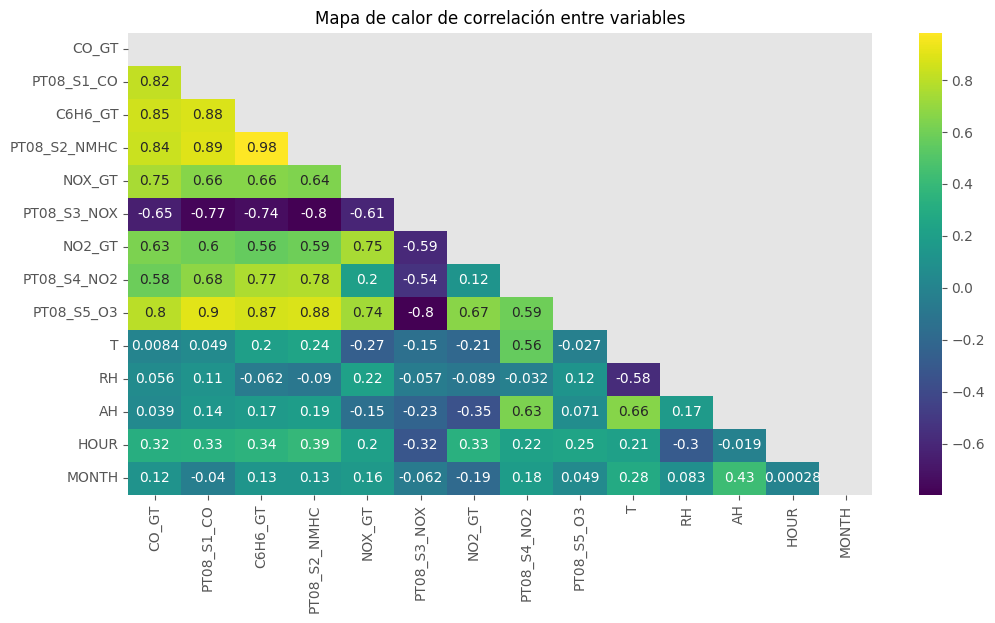

In [51]:
# 4) Comprender la correlación entre variables
# Usar mapa de calor para ver la correlación entre variables

# generar una mask para la diagonal inferior
mask = np.triu(np.ones_like(corr_M, dtype=bool))

plt.figure(figsize=(12, 6))
sns.heatmap(corr_M, mask=mask, annot=True, cmap="viridis")
plt.title("Mapa de calor de correlación entre variables", fontsize=12)
plt.grid(False)
plt.show()

In [52]:
datos.MONTH.value_counts()

3     1253
4      780
7      743
10     743
5      730
11     720
9      702
8      695
1      683
6      682
12     664
2      596
Name: MONTH, dtype: int64

(8991, 12)
Index(['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT',
       'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH'],
      dtype='object')


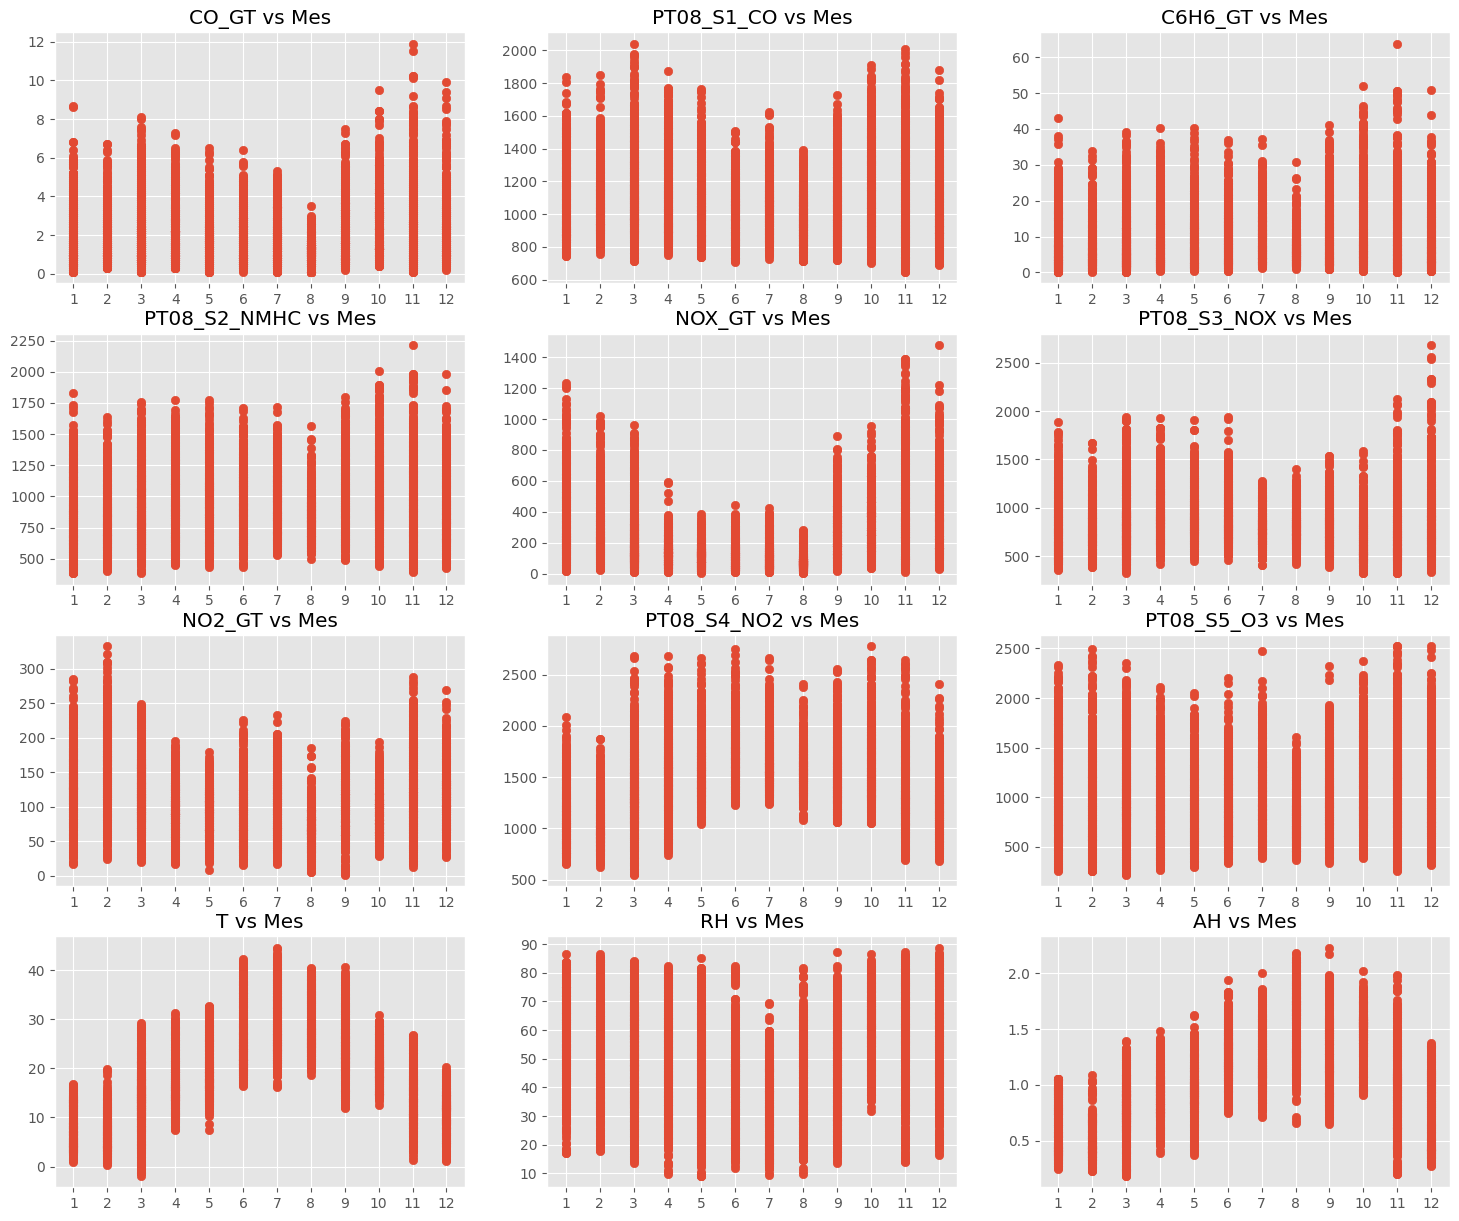

In [53]:
# Gráfica de distribución (varible vs mes)
columnas = datos.drop(columns=["HOUR", "MONTH"])
print(columnas.shape)
print(columnas.columns)

fig, axs = plt.subplots(4, 3, figsize=(18, 15))

cont = 0
for i in range(4):
    for j in range(3):
        axs[i, j].scatter(datos.MONTH, datos[columnas.columns[cont]])
        axs[i, j].set_title(f"{columnas.columns[cont]} vs Mes")
        axs[i, j].set_xticks(np.arange(1, 13))
        cont += 1

plt.show()

(8991, 12)
Index(['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT',
       'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH'],
      dtype='object')


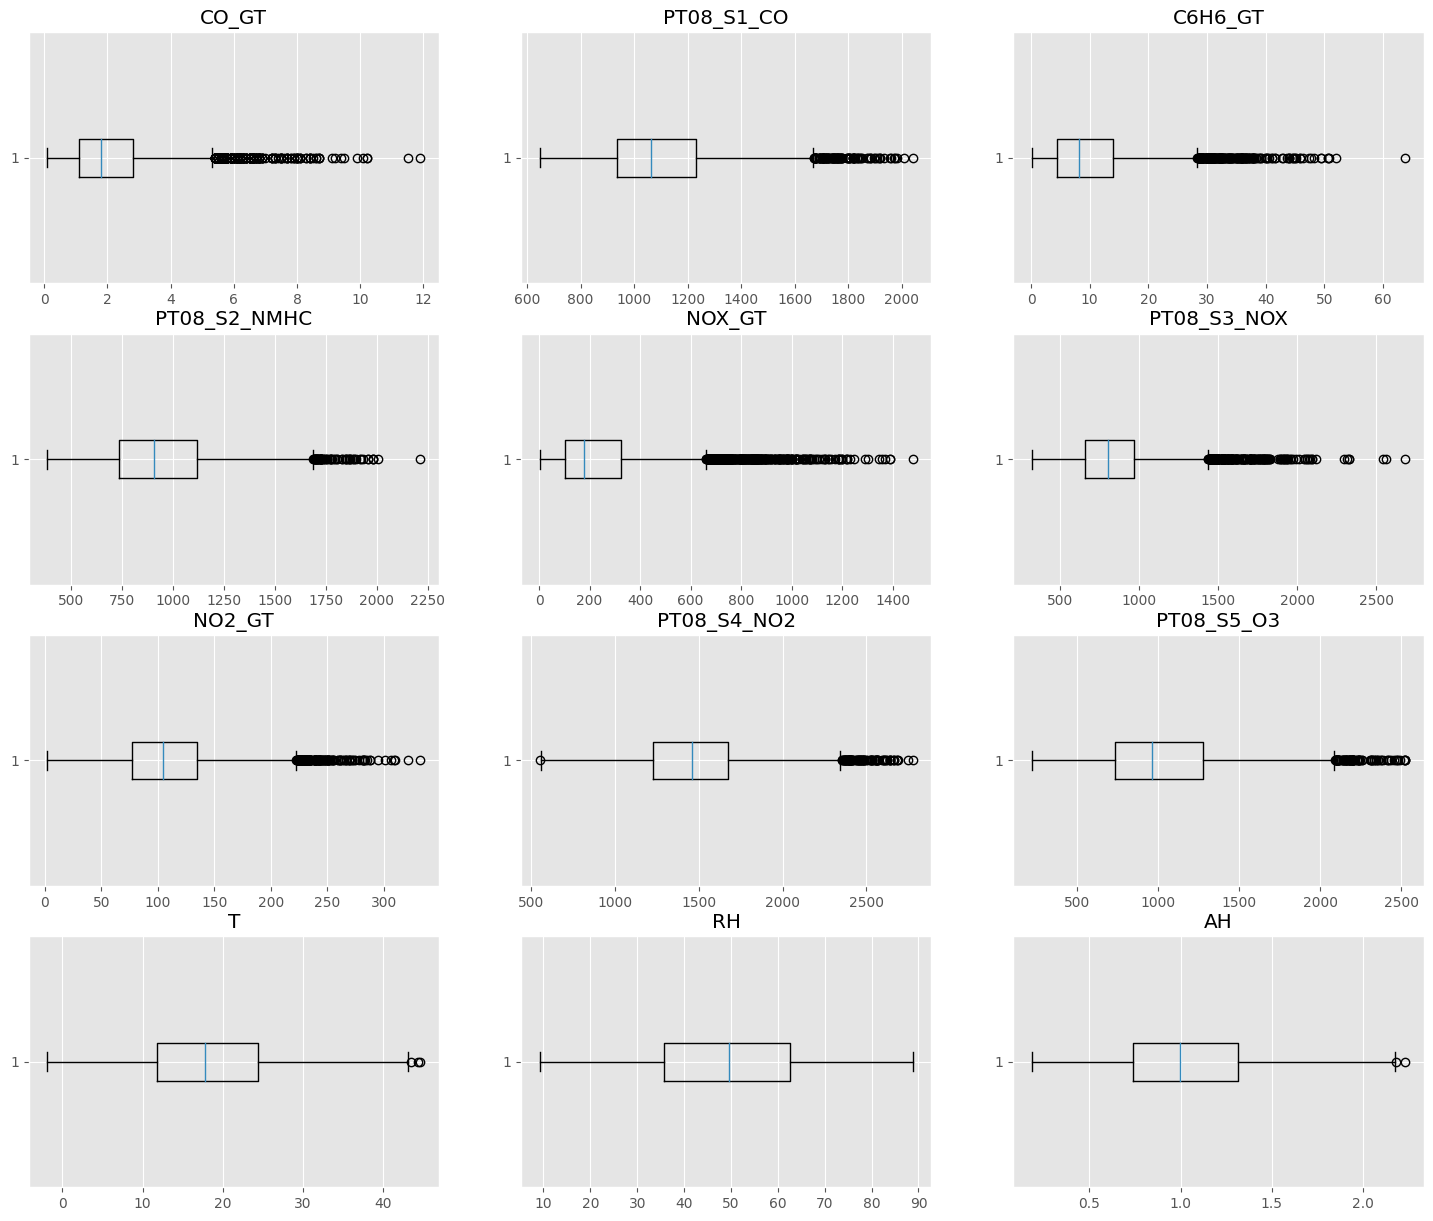

In [54]:
# Gráfica de boxplot por cada variable
columnas = datos.drop(columns=["HOUR", "MONTH"])
print(columnas.shape)
print(columnas.columns)

fig, axs = plt.subplots(4, 3, figsize=(18, 15))

cont = 0
for i in range(4):
    for j in range(3):
        axs[i, j].boxplot(datos[columnas.columns[cont]], vert=False)
        axs[i, j].set_title(f"{columnas.columns[cont]}")
        cont += 1

plt.show()

In [53]:
# plot all X-features against output variable RH
lista = datos.columns.tolist()
lista.remove("HOUR")
print(lista)

['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH', 'MONTH']


In [54]:
# Agrupar los datos por mes
moth_data = datos[lista].groupby("MONTH").mean()
moth_data.columns

Index(['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT',
       'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH'],
      dtype='object')

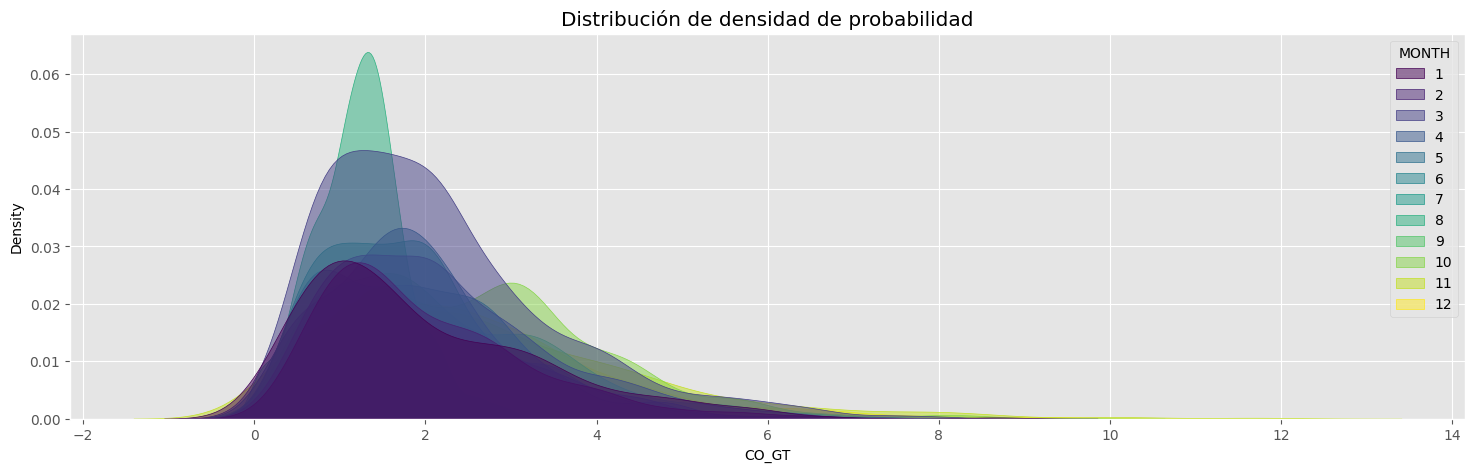

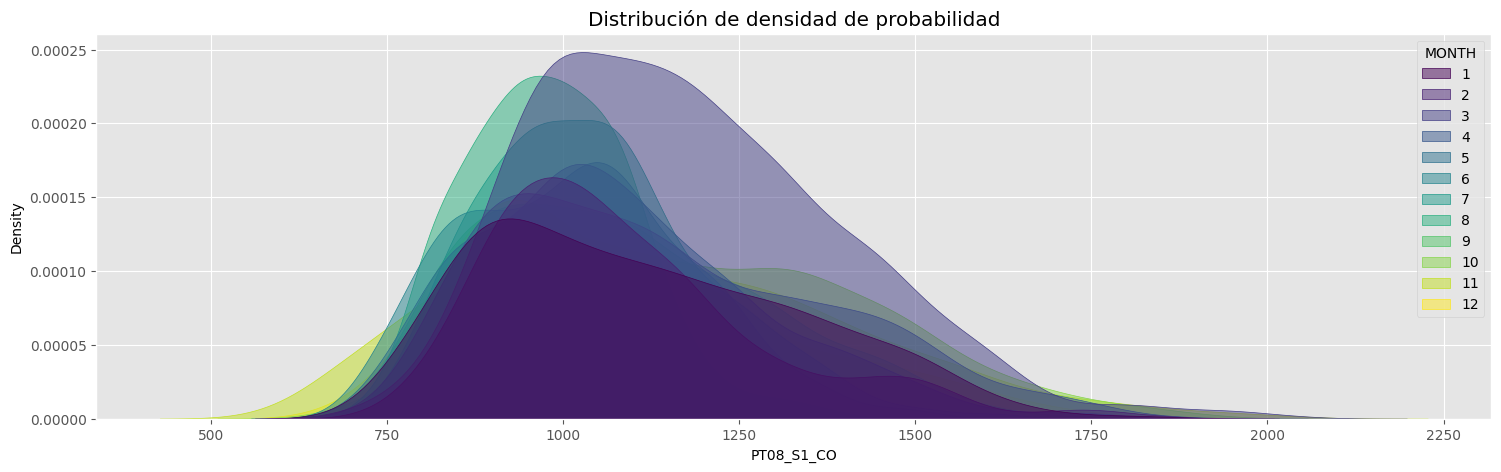

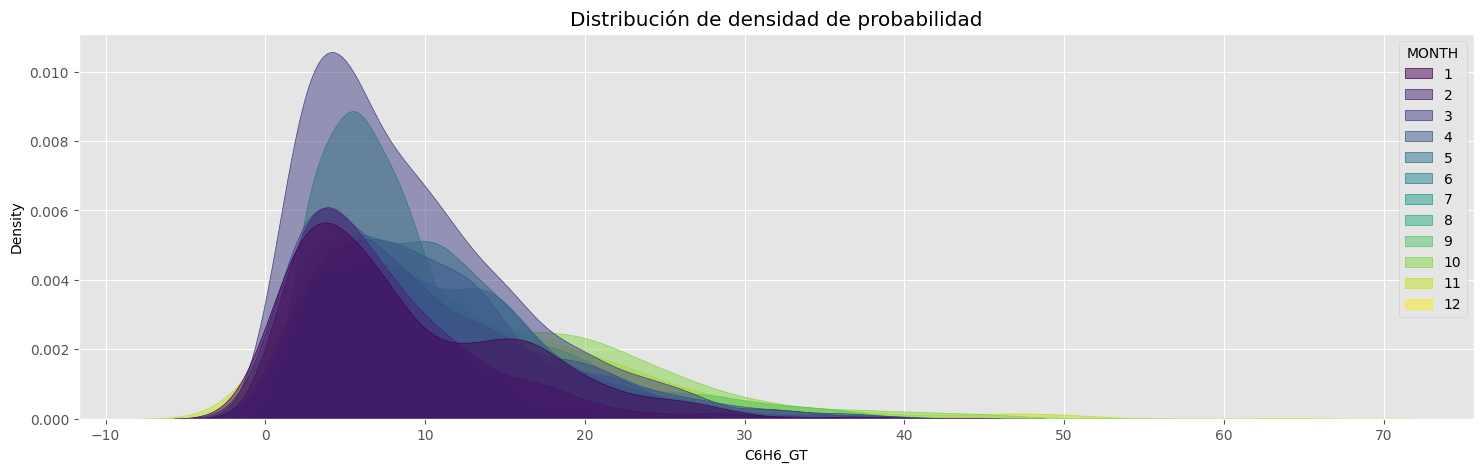

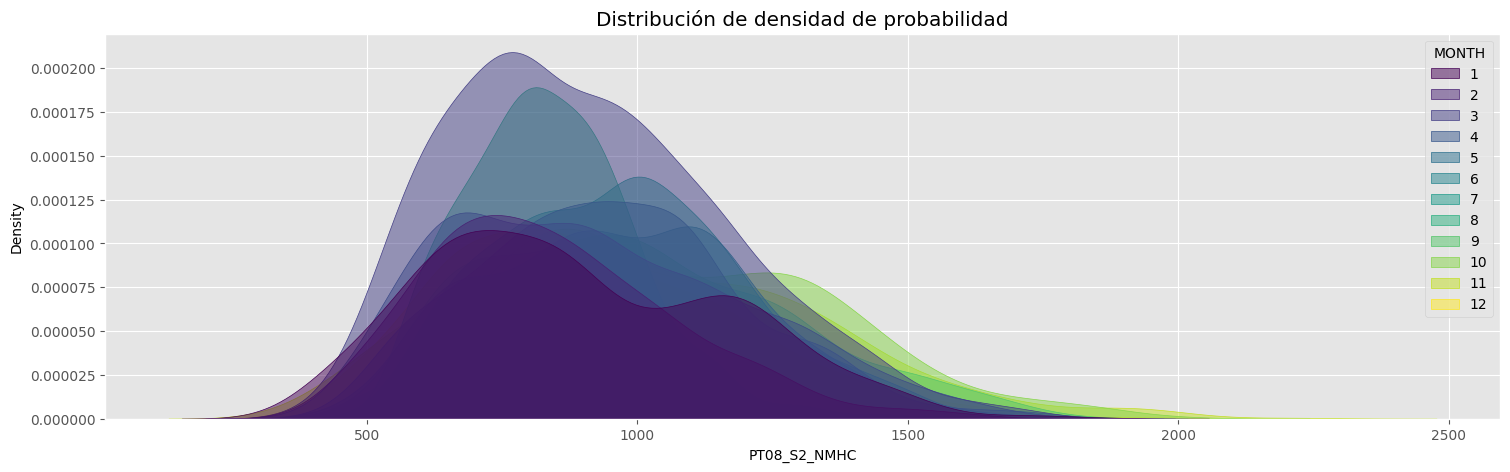

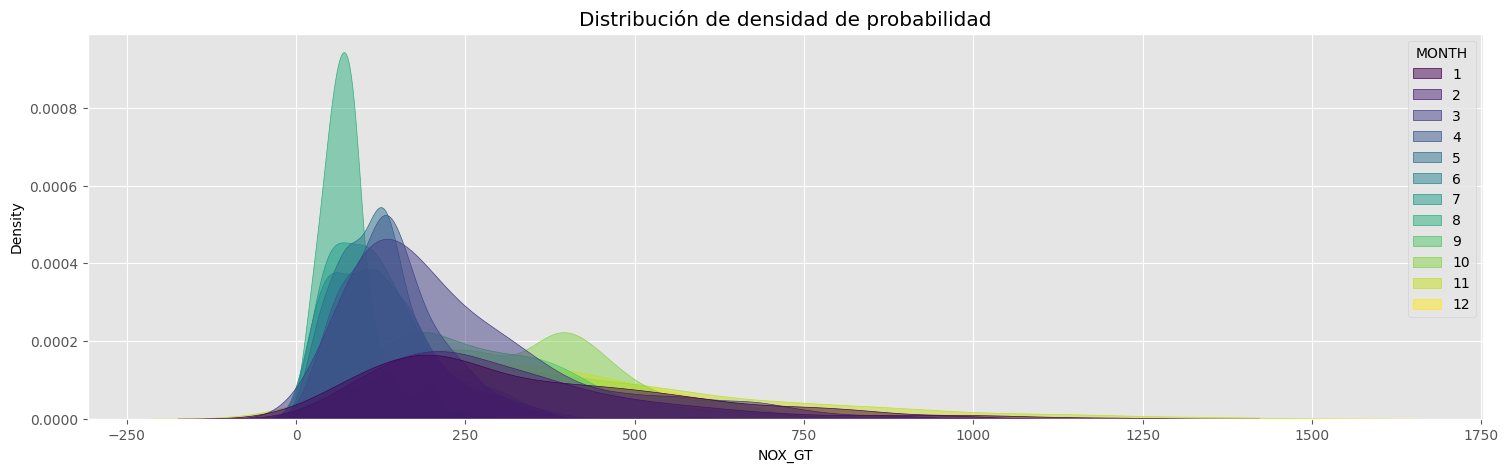

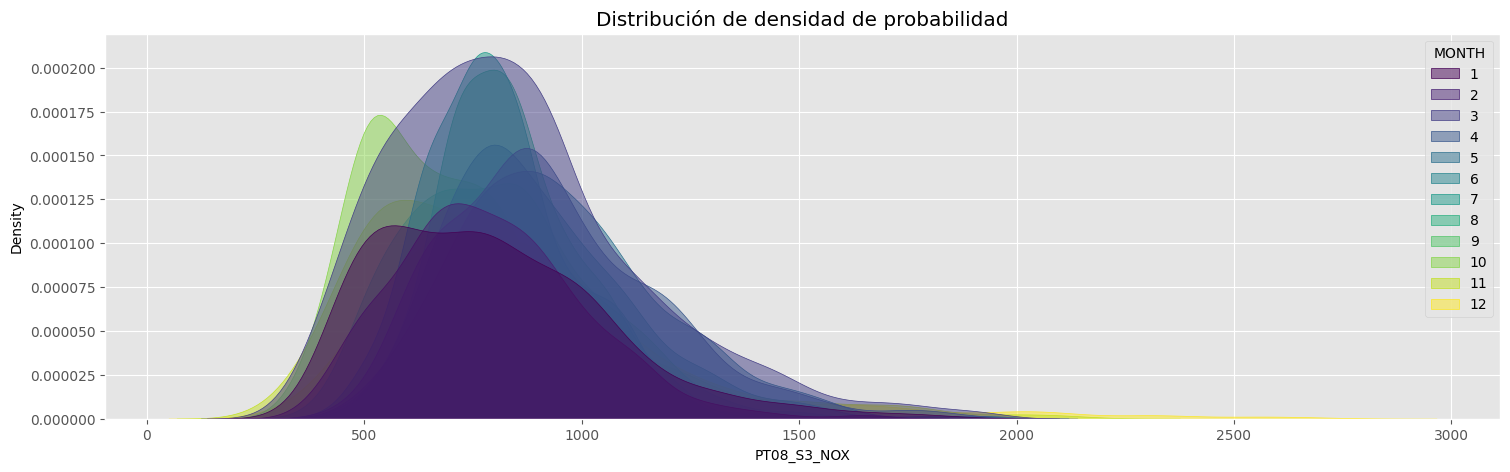

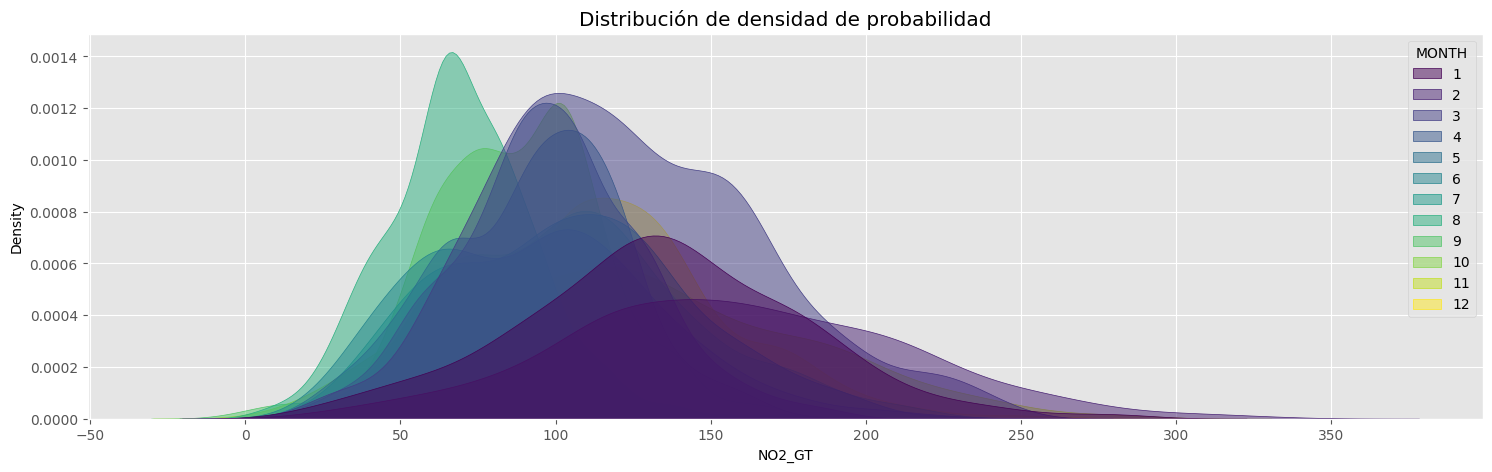

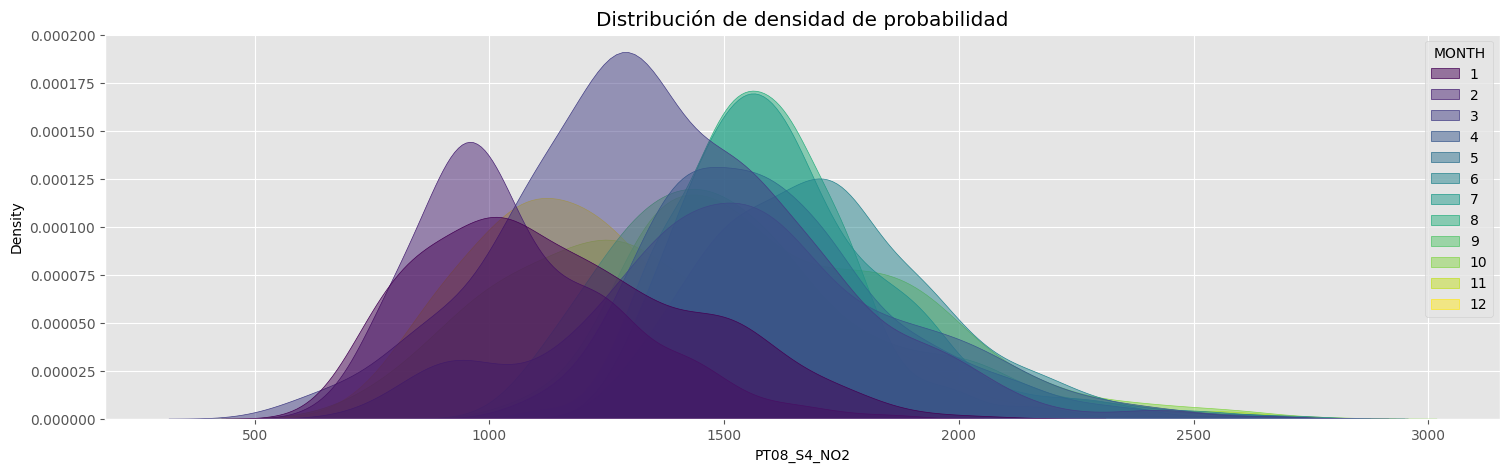

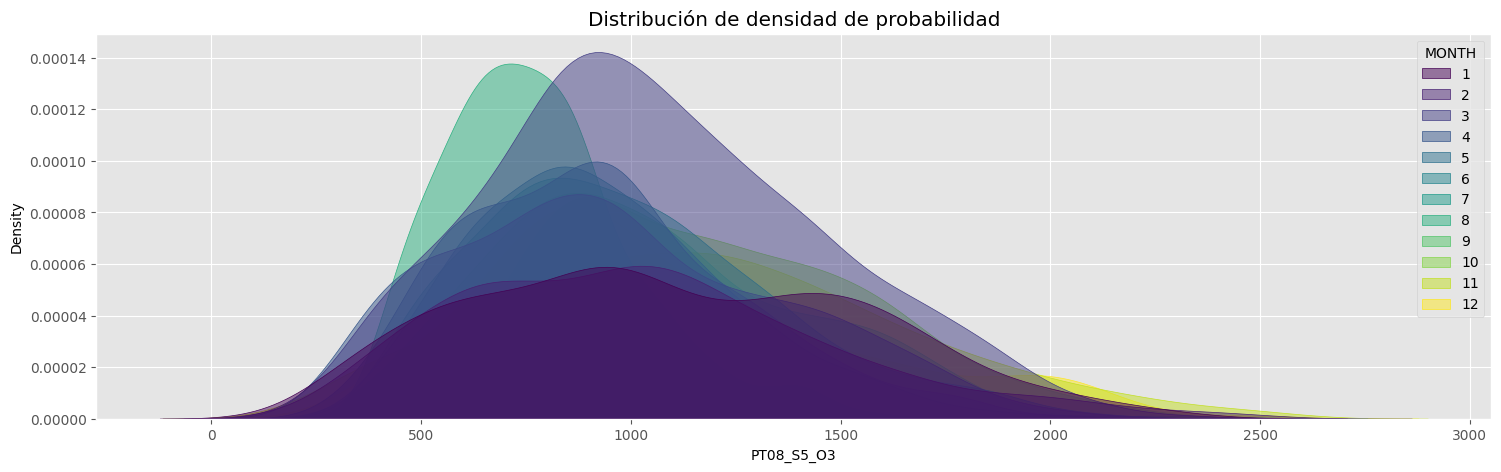

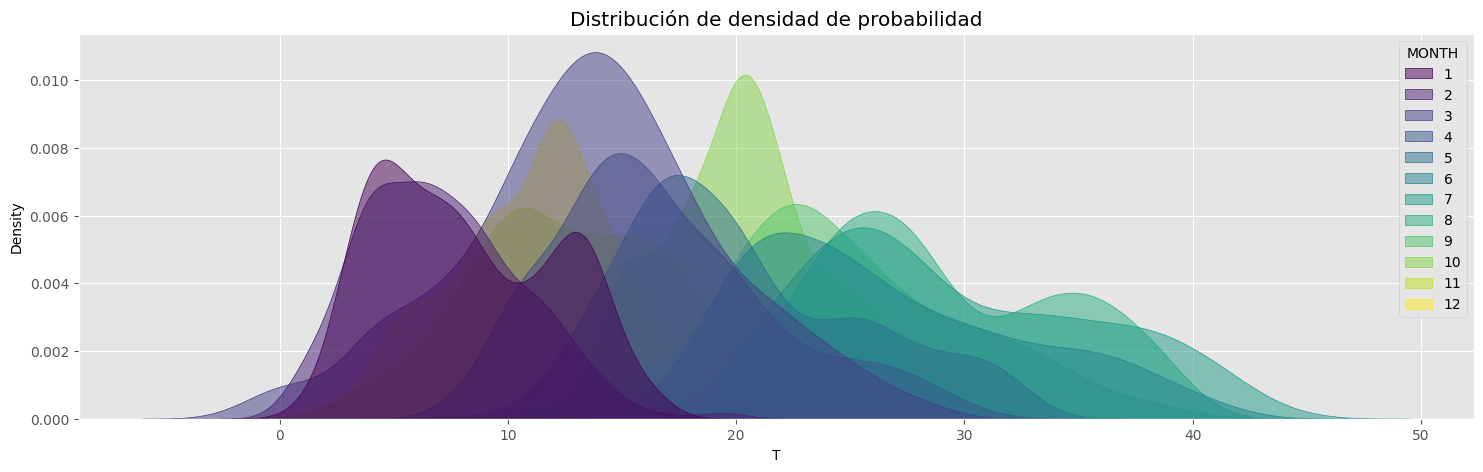

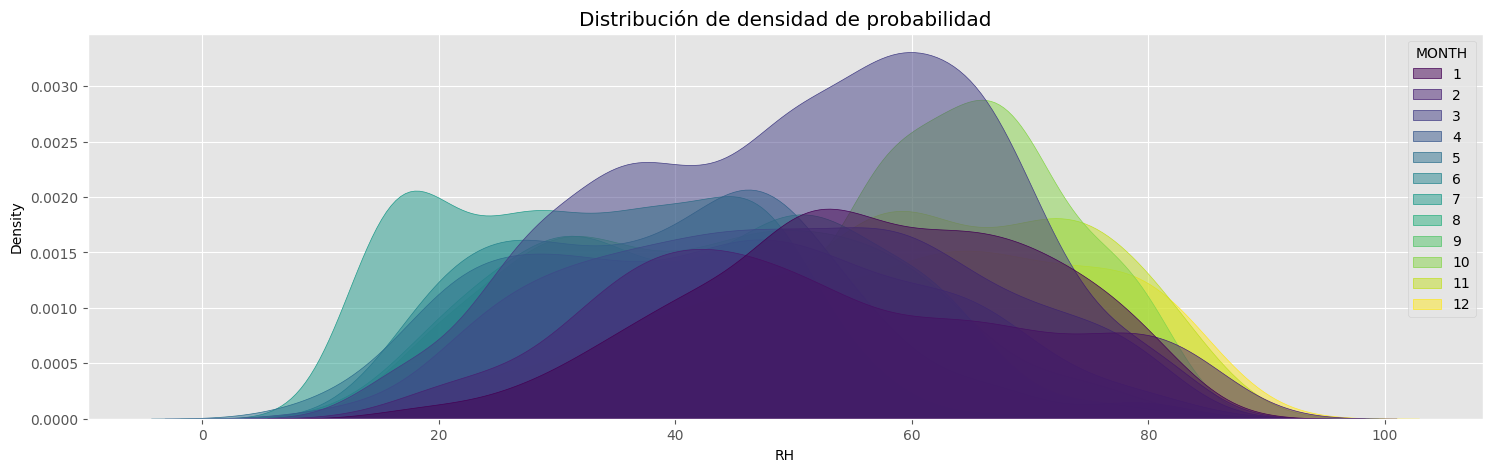

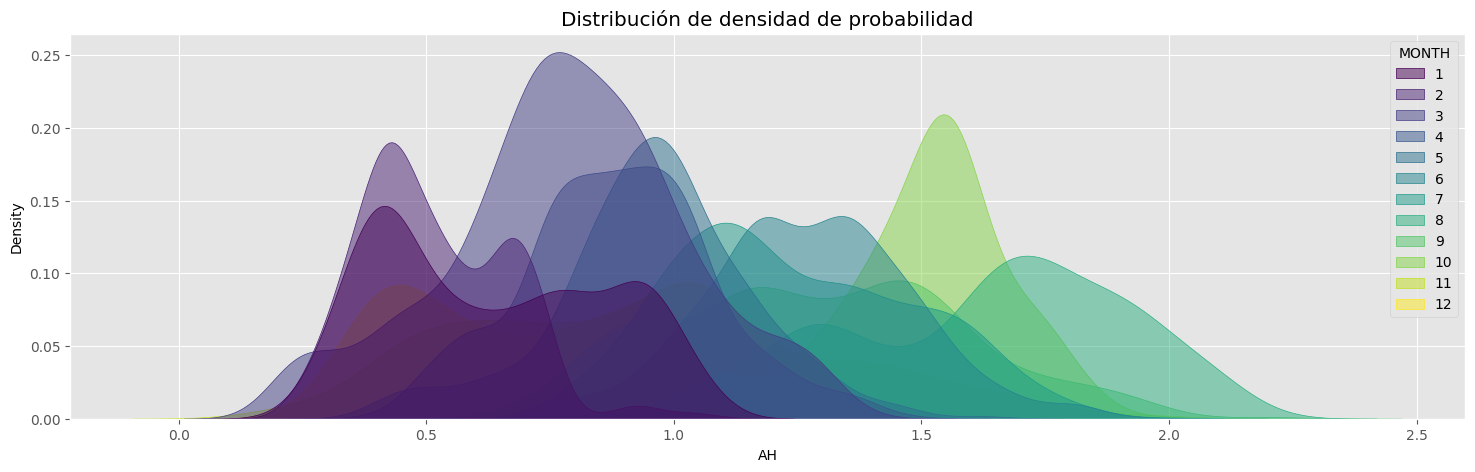

In [57]:
# Graficar la distribución mensual de cada variable
# corresponde a la variación de la media y desviación
# En series de tiempo se quiere un comportamiento de estacionariedad
def plot_data(col):
    fig, ax = plt.subplots(figsize=(18, 5))
    sns.kdeplot(
        data=datos, x=datos[col], hue="MONTH", fill=True, alpha=0.5, palette="viridis"
    )
    ax.grid(True)
    ax.set_title("Distribución de densidad de probabilidad")
    plt.show()


for col in moth_data.columns:
    plot_data(col)

In [63]:
df = datos[
    [
        "CO_GT",
        "PT08_S1_CO",
        "C6H6_GT",
        "PT08_S2_NMHC",
        "NOX_GT",
        "PT08_S3_NOX",
        "NO2_GT",
        "PT08_S4_NO2",
        "PT08_S5_O3",
        "T",
        "RH",
        "AH",
    ]
]

# Agrupar los datos por mes
# moth_data = datos.groupby('MONTH').mean()
# moth_data = df.resample("M").mean()

# Agrupar los datos por semana
week_data = df.resample("W").mean()

# Agrupar los datos por dia
# daily_data =datos.resample("D").mean()

In [64]:
agrupacion = week_data
agrupacion.head()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
DATE,,,,,,,,,,,,
2004-03-14,2.517693,1305.063721,10.067900,946.990173,160.508575,1097.622559,111.202209,1584.539185,1111.340698,12.473844,53.945927,0.755797
2004-03-21,2.731198,1336.038696,12.645089,1030.318481,171.727310,924.773804,112.366440,1716.375000,1219.563965,17.113327,48.988422,0.900742
2004-03-28,1.918945,1103.452393,8.124256,872.147339,116.459076,1071.449463,91.136536,1488.482178,861.849731,12.928711,52.396206,0.751587
2004-04-04,2.099432,1199.560547,9.417300,920.325745,132.167618,966.627258,97.892044,1542.448486,976.289368,16.293844,46.087025,0.826372
2004-04-11,2.029787,1114.024292,8.690687,891.661438,122.084198,989.543396,92.216583,1527.923584,881.211792,15.393446,49.994358,0.831163


In [65]:
agrupacion.columns

Index(['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT',
       'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH'],
      dtype='object')

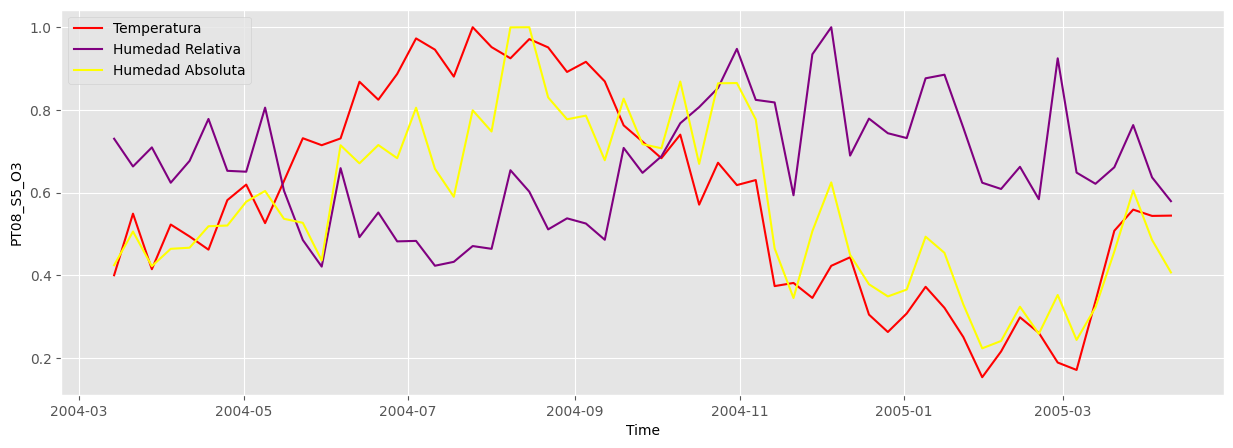

In [85]:
feat = {
    "T": ["Temperatura", "red"],
    "RH": ["Humedad Relativa", "purple"],
    "AH": ["Humedad Absoluta", "yellow"],
}
fisica = ["T", "RH", "AH"]
fig, ax = plt.subplots(figsize=(15, 5))
for var in fisica:
    ax.plot(
        agrupacion[var] / max(agrupacion[var]), label=feat[var][0], color=feat[var][1]
    )
ax.set_xlabel("Time")
ax.set_ylabel(col)
ax.legend()
ax.grid(True)
plt.show()

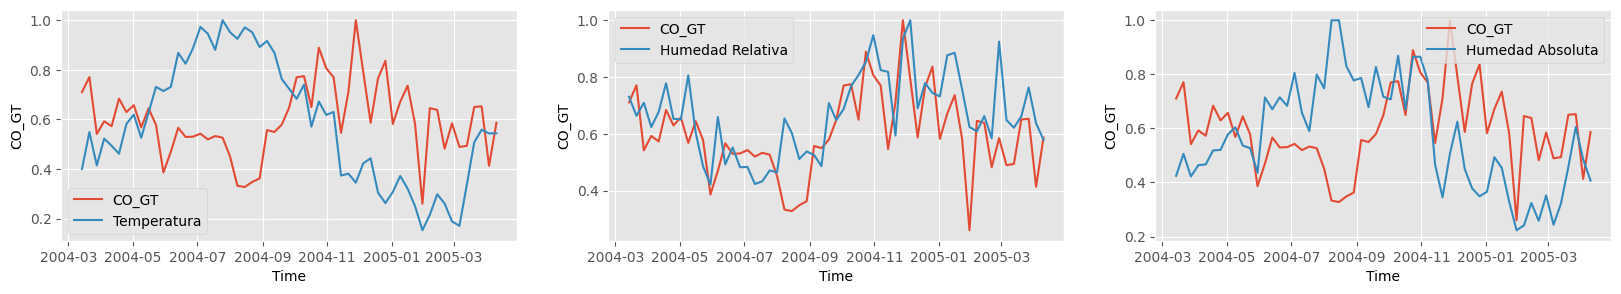

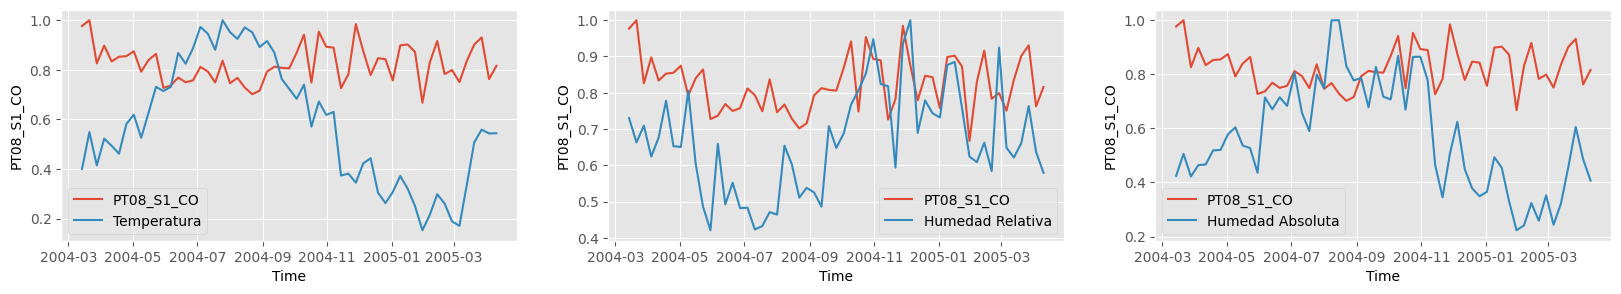

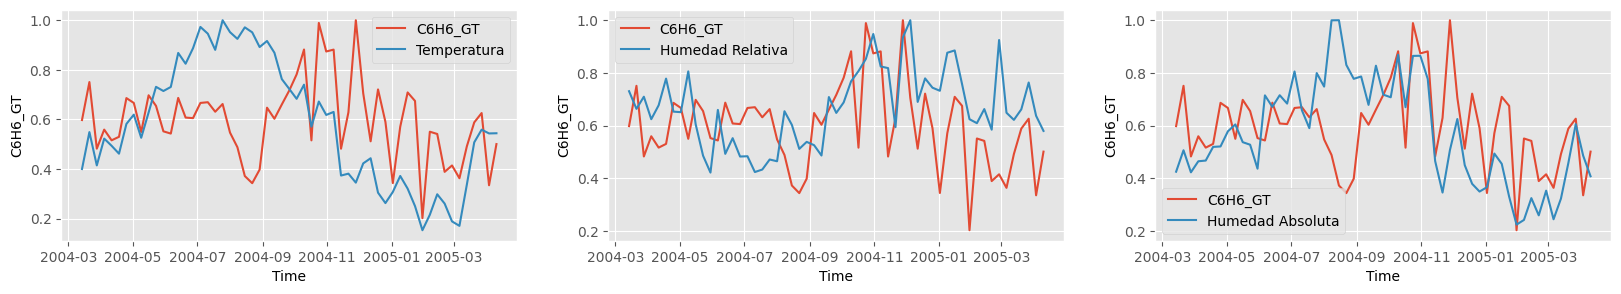

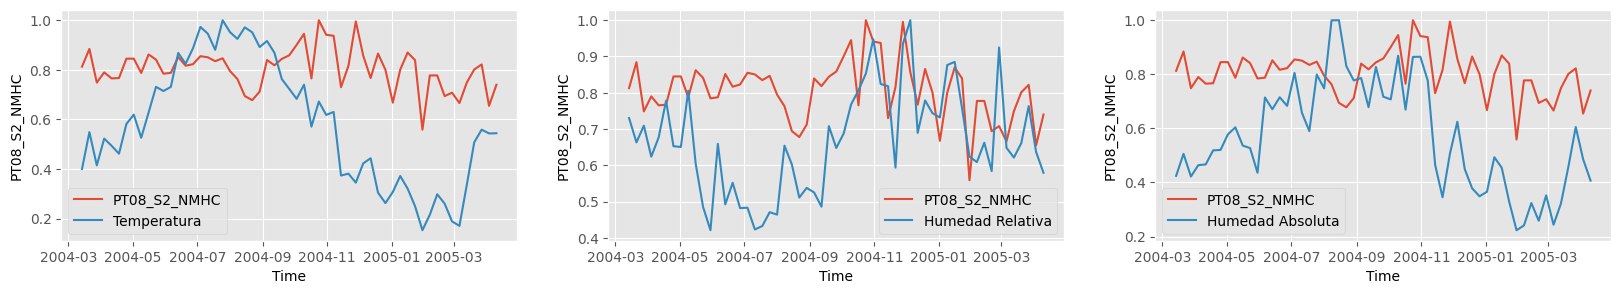

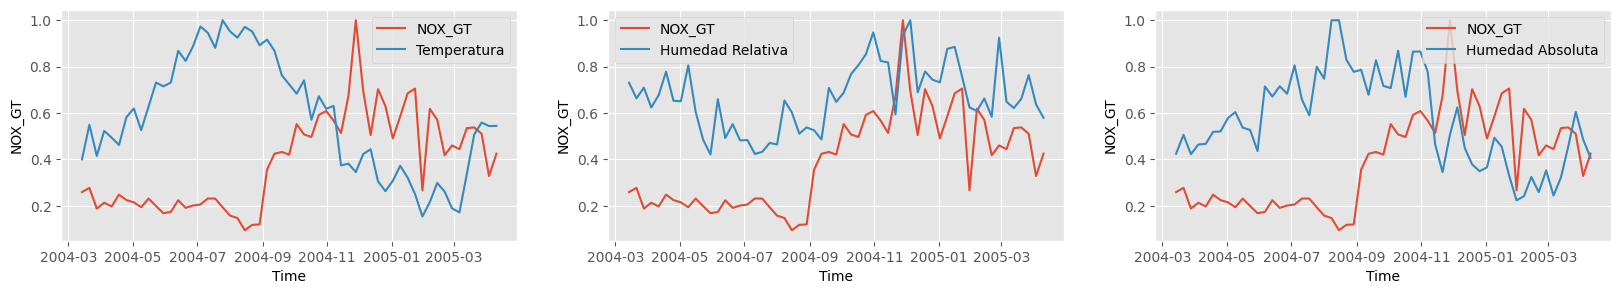

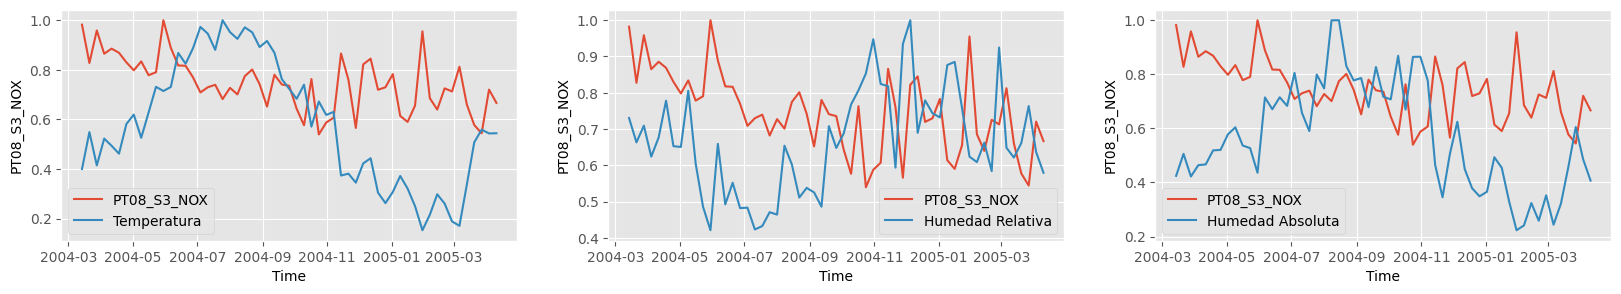

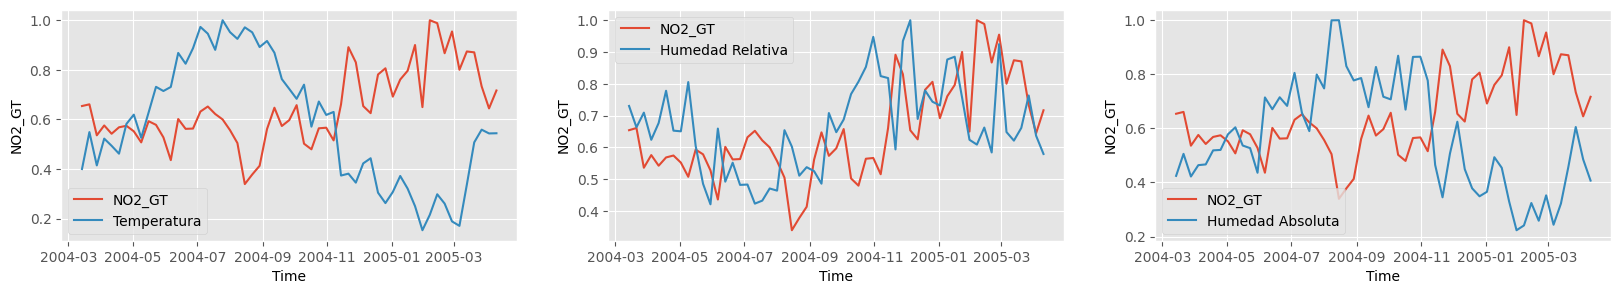

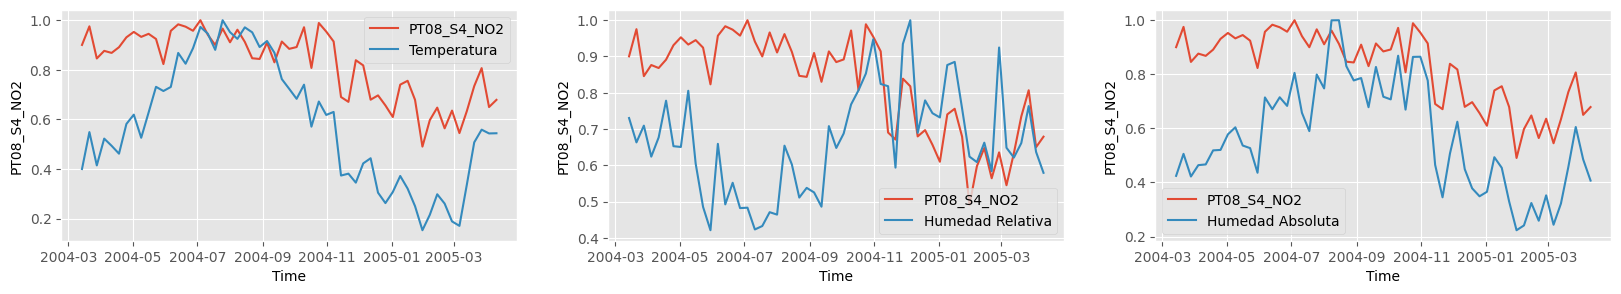

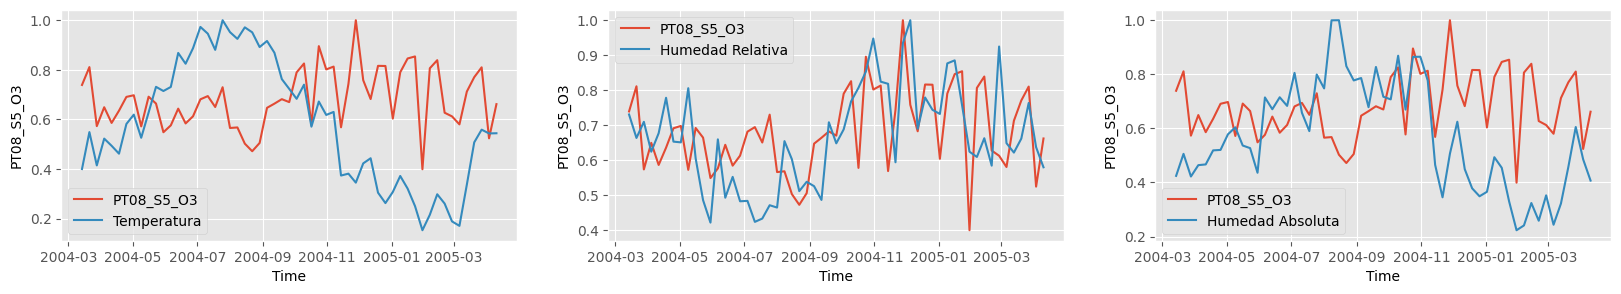

In [80]:
# Graficar la concentración semanal de cada gas
def plot_data(col):
    feat = {"T": "Temperatura", "RH": "Humedad Relativa", "AH": "Humedad Absoluta"}
    fisica = ["T", "RH", "AH"]
    fig, ax = plt.subplots(1, 3, figsize=(20, 3))
    for i, f in enumerate(fisica):
        ax[i].plot(agrupacion[col] / max(agrupacion[col]), label=col)
        ax[i].plot(agrupacion[f] / max(agrupacion[f]), label=feat[f])
        ax[i].set_xlabel("Time")
        ax[i].set_ylabel(col)
        ax[i].legend()
        ax[i].grid(True)
    plt.show()


for col in agrupacion.drop(columns=["T", "RH", "AH"]).columns:
    plot_data(col)

# Modelo Machine Learning (Clustering)
# Kmeans

In [62]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8991 entries, 2004-03-10 to 2005-04-04
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO_GT         8991 non-null   float16
 1   PT08_S1_CO    8991 non-null   float16
 2   C6H6_GT       8991 non-null   float16
 3   PT08_S2_NMHC  8991 non-null   float16
 4   NOX_GT        8991 non-null   float16
 5   PT08_S3_NOX   8991 non-null   float16
 6   NO2_GT        8991 non-null   float16
 7   PT08_S4_NO2   8991 non-null   float16
 8   PT08_S5_O3    8991 non-null   float16
 9   T             8991 non-null   float16
 10  RH            8991 non-null   float16
 11  AH            8991 non-null   float16
 12  HOUR          8991 non-null   int8   
 13  MONTH         8991 non-null   int8   
dtypes: float16(12), int8(2)
memory usage: 298.5 KB


In [63]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
CO_GT,8991.0,2.117188,1.370117,0.099976,1.099609,1.799805,2.800781,11.898438
PT08_S1_CO,8991.0,inf,inf,647.000000,937.000000,1063.000000,1231.000000,2040.000000
C6H6_GT,8991.0,inf,7.449219,0.149048,4.435547,8.242188,13.992188,63.750000
PT08_S2_NMHC,8991.0,inf,inf,383.250000,734.250000,909.000000,1116.000000,2214.000000
NOX_GT,8991.0,inf,inf,2.000000,101.000000,179.000000,325.000000,1479.000000
PT08_S3_NOX,8991.0,inf,inf,322.000000,658.000000,805.500000,969.250000,2682.000000
NO2_GT,8991.0,inf,45.031250,2.000000,76.812500,104.500000,135.000000,332.500000
PT08_S4_NO2,8991.0,inf,inf,551.000000,1226.500000,1463.000000,1674.000000,2776.000000
PT08_S5_O3,8991.0,inf,inf,221.000000,731.250000,963.000000,1273.500000,2522.000000
T,8991.0,inf,8.828125,-1.900391,11.785156,17.750000,24.406250,44.593750


In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [65]:
scaler = MinMaxScaler().fit(datos.values)
df = pd.DataFrame(scaler.transform(datos.values), columns=datos.columns)

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO_GT,8991.0,0.170898,0.116089,0.0,0.084717,0.144165,0.229004,1.000000
PT08_S1_CO,8991.0,0.324951,0.155762,0.0,0.208008,0.298340,0.418945,0.999512
C6H6_GT,8991.0,0.156250,0.117126,0.0,0.067474,0.127319,0.217773,1.000977
PT08_S2_NMHC,8991.0,0.303467,0.145630,0.0,0.191650,0.287109,0.400146,1.000000
NOX_GT,8991.0,0.160889,0.132812,0.0,0.067017,0.119873,0.218750,0.999512
PT08_S3_NOX,8991.0,0.217529,0.108765,0.0,0.142334,0.204834,0.274170,1.000000
NO2_GT,8991.0,0.324707,0.136230,0.0,0.226318,0.310059,0.402344,1.000000
PT08_S4_NO2,8991.0,0.406982,0.155640,0.0,0.303711,0.409912,0.504883,1.000000
PT08_S5_O3,8991.0,0.348633,0.173218,0.0,0.221802,0.322510,0.457764,1.000977
T,8991.0,0.434570,0.189941,0.0,0.294189,0.422363,0.565918,1.000000


In [67]:
df.head()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
0,0.211914,0.511719,0.184570,0.362061,0.111084,0.311035,0.335693,0.512695,0.455078,0.333252,0.499023,0.280273,0.782715,0.181885
1,0.161133,0.462891,0.145508,0.312256,0.068420,0.360840,0.272217,0.453369,0.326416,0.326660,0.483887,0.264404,0.826172,0.181885
2,0.177979,0.541504,0.139282,0.303467,0.087341,0.346436,0.338867,0.450928,0.370850,0.296631,0.562988,0.276367,0.869629,0.181885
3,0.177979,0.522949,0.142822,0.308350,0.115112,0.326172,0.363037,0.464600,0.426758,0.277344,0.638672,0.294434,0.913086,0.181885
4,0.127197,0.448242,0.100220,0.246826,0.087341,0.374268,0.344727,0.422119,0.386475,0.280518,0.633301,0.295410,0.956543,0.181885


In [68]:
kmeans = KMeans(n_clusters=6, n_init=10).fit(df.values)
df["cluster"] = kmeans.labels_

In [69]:
df.head()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH,cluster
0,0.211914,0.511719,0.184570,0.362061,0.111084,0.311035,0.335693,0.512695,0.455078,0.333252,0.499023,0.280273,0.782715,0.181885,0
1,0.161133,0.462891,0.145508,0.312256,0.068420,0.360840,0.272217,0.453369,0.326416,0.326660,0.483887,0.264404,0.826172,0.181885,0
2,0.177979,0.541504,0.139282,0.303467,0.087341,0.346436,0.338867,0.450928,0.370850,0.296631,0.562988,0.276367,0.869629,0.181885,0
3,0.177979,0.522949,0.142822,0.308350,0.115112,0.326172,0.363037,0.464600,0.426758,0.277344,0.638672,0.294434,0.913086,0.181885,0
4,0.127197,0.448242,0.100220,0.246826,0.087341,0.374268,0.344727,0.422119,0.386475,0.280518,0.633301,0.295410,0.956543,0.181885,0


In [70]:
kmeans.cluster_centers_

array([[0.14148498, 0.30189259, 0.11298226, 0.2592525 , 0.1413663 ,
        0.22420307, 0.37997213, 0.30074191, 0.2924416 , 0.32957888,
        0.42827183, 0.23578507, 0.74084049, 0.16422805],
       [0.30883942, 0.55059864, 0.29867262, 0.47970123, 0.2708678 ,
        0.11510531, 0.46738046, 0.55102228, 0.58187975, 0.38608657,
        0.52631665, 0.35630225, 0.5922465 , 0.21118503],
       [0.10172976, 0.1997557 , 0.07813452, 0.20061026, 0.10651797,
        0.27806755, 0.22188894, 0.35688225, 0.25138693, 0.43149272,
        0.60154739, 0.50371165, 0.19424932, 0.74165403],
       [0.29251821, 0.47090418, 0.28098997, 0.45477477, 0.32458853,
        0.12074997, 0.38895312, 0.49908035, 0.5227799 , 0.42092486,
        0.61330155, 0.49645482, 0.65801299, 0.87227101],
       [0.14883432, 0.29123457, 0.16078992, 0.32332571, 0.09728823,
        0.21685243, 0.30044703, 0.4701613 , 0.29751864, 0.67600114,
        0.27247738, 0.50649366, 0.69896818, 0.56182868],
       [0.0943936 , 0.23821644, 0.0

In [71]:
kmeans.inertia_

1922.3939851725077

In [72]:
# df.drop(['cluster']).head()
cv = df.drop(["cluster"], axis=1)
cv.head()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
0,0.211914,0.511719,0.184570,0.362061,0.111084,0.311035,0.335693,0.512695,0.455078,0.333252,0.499023,0.280273,0.782715,0.181885
1,0.161133,0.462891,0.145508,0.312256,0.068420,0.360840,0.272217,0.453369,0.326416,0.326660,0.483887,0.264404,0.826172,0.181885
2,0.177979,0.541504,0.139282,0.303467,0.087341,0.346436,0.338867,0.450928,0.370850,0.296631,0.562988,0.276367,0.869629,0.181885
3,0.177979,0.522949,0.142822,0.308350,0.115112,0.326172,0.363037,0.464600,0.426758,0.277344,0.638672,0.294434,0.913086,0.181885
4,0.127197,0.448242,0.100220,0.246826,0.087341,0.374268,0.344727,0.422119,0.386475,0.280518,0.633301,0.295410,0.956543,0.181885


In [73]:
inercias = {}
for k in range(3, 10):
    km = KMeans(n_clusters=k, n_init=10).fit(df.drop(["cluster"], axis=1).values)
    inercias[k] = km.inertia_

En KMeans se quiere número de clusters y valor de inercia bajos 

In [74]:
print(inercias)

{3: 2808.4989350030405, 4: 2402.0983117252226, 5: 2101.517893661539, 6: 1922.392934705975, 7: 1752.936311556373, 8: 1644.386895801933, 9: 1565.3299563801868}


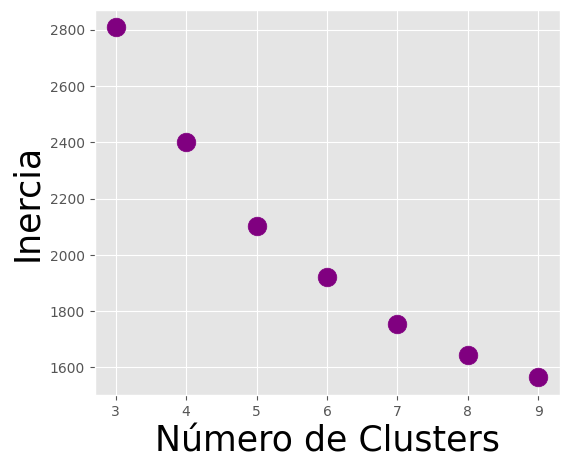

In [76]:
plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(inercias.keys(), inercias.values(), marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.grid(True)
plt.show()